### Relaxed Challenge

Relax Inc. makes productivity and project management software that's popular with both individuals and teams. Founded by several former Facebook employees, it's considered a great company to work for.

The data is available as two attached CSV files:

takehome_user_engagement.csv
takehome_users.csv

The data has the following two tables:

1) A user table ("takehome_users") with data on 12,000 users who signed up for the product in the last two years. This table includes:

- name: the user's name
- object_id: the user's id
- email: email address
- creation_source: how their account was created. This takes on one of 5 values:
    - PERSONAL_PROJECTS: invited to join another user's personal workspace
    - GUEST_INVITE: invited to an organization as a guest (limited permissions)
    - ORG_INVITE: invited to an organization (as a full member)
    - SIGNUP: signed up via the website
    - SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login id)
- creation_time: when they created their account
- last_session_creation_time: unix timestamp of last login
- opted_in_to_mailing_list: whether they have opted into receiving marketing emails
- enabled_for_marketing_drip: whether they are on the regular marketing email drip
- org_id: the organization (group of users) they belong to
- invited_by_user_id: which user invited them to join (if applicable).

2) A usage summary table ("takehome_user_engagement") that has a row for each day that a user logged into the product.

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period, identify which factors predict future user adoption.


We suggest spending 1-­2 hours on this, but you're welcome to spend more or less. Please send us a brief writeup of your findings (the more concise, the better ­­ no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.



In [153]:
import pandas as pd
import numpy as np

In [154]:
user=pd.read_csv('takehome_users.csv',encoding='latin1')
usage=pd.read_csv('takehome_user_engagement.csv')

In [155]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [156]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [157]:
user.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [158]:
usage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [159]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [160]:
usage.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [161]:
# convert time_stamp to datetime
usage['time_stamp'] = pd.to_datetime(usage['time_stamp'])
# Define adopted users
adopted_users = usage.groupby('user_id').rolling('7D', on='time_stamp')['visited'].sum()
adopted_users = adopted_users.reset_index()
adopted_users.rename(columns={'visited': 'visited_7D'}, inplace=True)
adopted_users['adopted']=np.where(adopted_users['visited_7D']>=3, 1,0)

In [162]:
adopted_users.head()

,user_id,time_stamp,visited_7D,adopted
0,1,2014-04-22 03:53:30,1.0,0
1,2,2013-11-15 03:45:04,1.0,0
2,2,2013-11-29 03:45:04,1.0,0
3,2,2013-12-09 03:45:04,1.0,0
4,2,2013-12-25 03:45:04,1.0,0


In [163]:
# groupby user_id, and if the sum of adopted >= 1 then True, else False
adopted = pd.DataFrame(adopted_users.groupby('user_id')['adopted'].sum()>=1).reset_index()
# convert boolean to int
adopted['adopted'] = adopted['adopted'].astype(int)

In [164]:
adopted.head()

,user_id,adopted
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [165]:
# Merge user data with adopted user status
user_adopted_usage = pd.merge(user, adopted, left_on='object_id', right_on='user_id', how='left')
user_adopted_usage['adopted'] = user_adopted_usage['adopted'].fillna(False).astype(int)

In [166]:
user_adopted_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  user_id                     8823 non-null   float64
 11  adopted                     12000 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 1.1+ MB


In [167]:
user_adopted_usage.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
user_id                       3177
adopted                          0
dtype: int64

#### Filling Missing Values

In [168]:
# change invited_by_user_id column to binary value(1, 0) based on whether a user was invited by another user or not
user_adopted_usage['invited_by_user_id']=user_adopted_usage['invited_by_user_id'].notnull().astype(int)
# fill last_session_creation_time missing values with 0
user_adopted_usage.fillna(0,inplace=True)

In [169]:
#drop unused columns
user_adopted_usage=user_adopted_usage.drop(columns=['user_id','name','email','creation_time'])

In [170]:
user_adopted_usage.head()

,object_id,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,GUEST_INVITE,1.398139e+09,1,0,11,1,0
1,2,ORG_INVITE,1.396238e+09,0,0,1,1,1
2,3,ORG_INVITE,1.363735e+09,0,0,94,1,0
3,4,GUEST_INVITE,1.369210e+09,0,0,1,1,0
4,5,GUEST_INVITE,1.358850e+09,0,0,193,1,0


In [171]:
user_adopted_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_source             12000 non-null  object 
 2   last_session_creation_time  12000 non-null  float64
 3   opted_in_to_mailing_list    12000 non-null  int64  
 4   enabled_for_marketing_drip  12000 non-null  int64  
 5   org_id                      12000 non-null  int64  
 6   invited_by_user_id          12000 non-null  int64  
 7   adopted                     12000 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 750.1+ KB


In [172]:
user_adopted_usage.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
count,12000.00000,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,1.014115e+09,0.249500,0.149333,141.884583,0.534750,0.133500
std,3464.24595,6.087938e+08,0.432742,0.356432,124.056723,0.498812,0.340128
min,1.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,0.000000e+00,0.000000,0.000000,29.000000,0.000000,0.000000
50%,6000.50000,1.368880e+09,0.000000,0.000000,108.000000,1.000000,0.000000
75%,9000.25000,1.393729e+09,0.000000,0.000000,238.250000,1.000000,0.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,1.000000,1.000000


#### Show the correlation matrix between variables

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [200]:
correlation_matrix = user_adopted_usage.corr()
correlation_matrix

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,C_ORG_INVITE,C_PERSONAL_PROJECTS,C_SIGNUP,C_SIGNUP_GOOGLE_AUTH
object_id,1.000000,0.009651,-0.032370,-0.022040,0.004110,-0.009149,0.005750,-0.003988,-0.003357,0.002692,0.015089
last_session_creation_time,0.009651,1.000000,0.010916,0.012604,0.010231,0.022033,0.246048,0.023615,-0.390789,0.180927,0.216649
opted_in_to_mailing_list,-0.032370,0.010916,1.000000,0.483529,0.003432,0.006934,0.008097,0.006694,-0.007432,0.002181,-0.004555
enabled_for_marketing_drip,-0.022040,0.012604,0.483529,1.000000,0.009275,0.002216,0.004653,0.004270,-0.007518,0.004528,0.000127
org_id,0.004110,0.010231,0.003432,0.009275,1.000000,-0.018442,0.064523,-0.017586,0.008974,0.016140,-0.001052
invited_by_user_id,-0.009149,0.022033,0.006934,0.002216,-0.018442,1.000000,0.027671,0.691238,-0.495336,-0.491916,-0.387255
adopted,0.005750,0.246048,0.008097,0.004653,0.064523,0.027671,1.000000,-0.007636,-0.075817,0.009299,0.036119
C_ORG_INVITE,-0.003988,0.023615,0.006694,0.004270,-0.017586,0.691238,-0.007636,1.000000,-0.342395,-0.340031,-0.267686
C_PERSONAL_PROJECTS,-0.003357,-0.390789,-0.007432,-0.007518,0.008974,-0.495336,-0.075817,-0.342395,1.000000,-0.211995,-0.166891
C_SIGNUP,0.002692,0.180927,0.002181,0.004528,0.016140,-0.491916,0.009299,-0.340031,-0.211995,1.000000,-0.165739


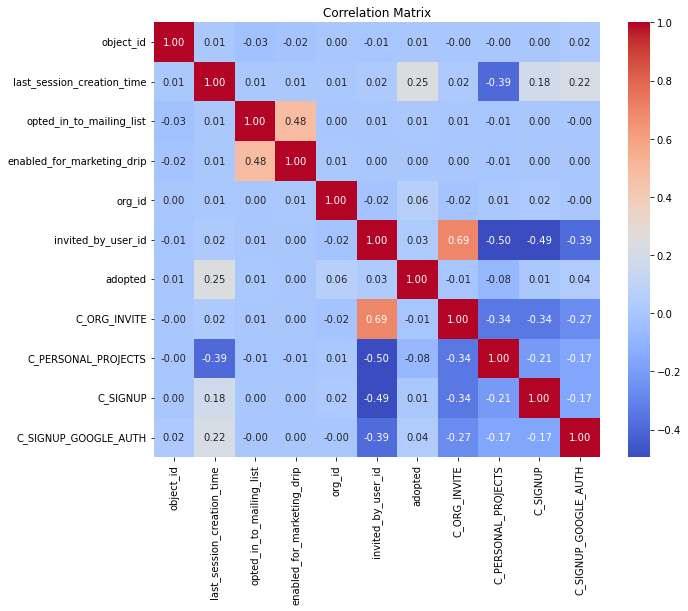

In [198]:
correlation_matrix = user_adopted_usage.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


##### Visualize the distribution of adopted and non-adopted users (1, 0) for features

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

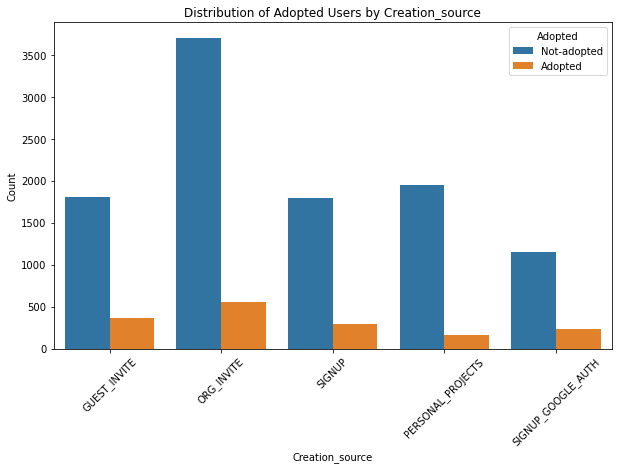

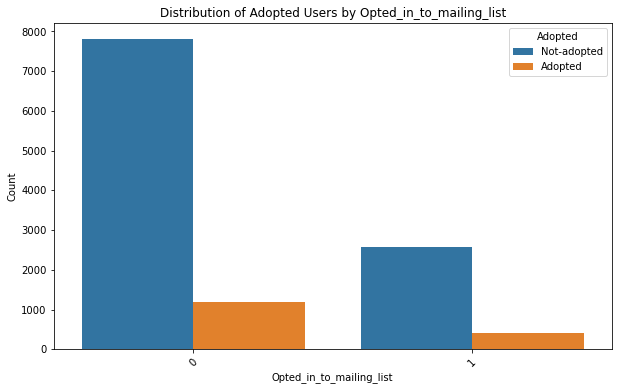

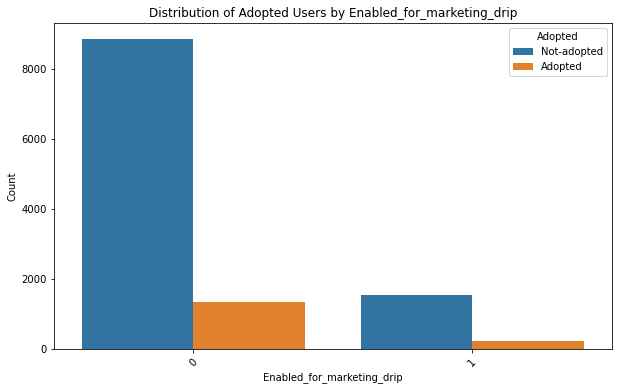

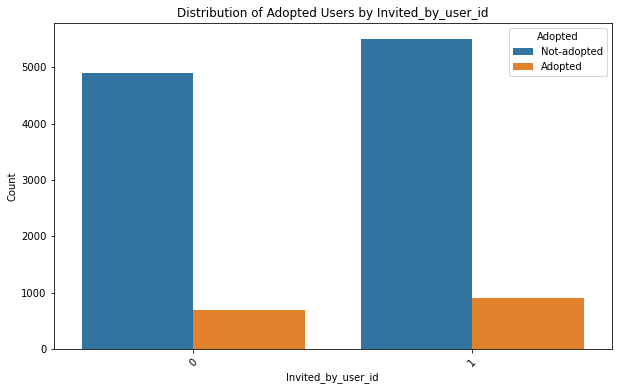

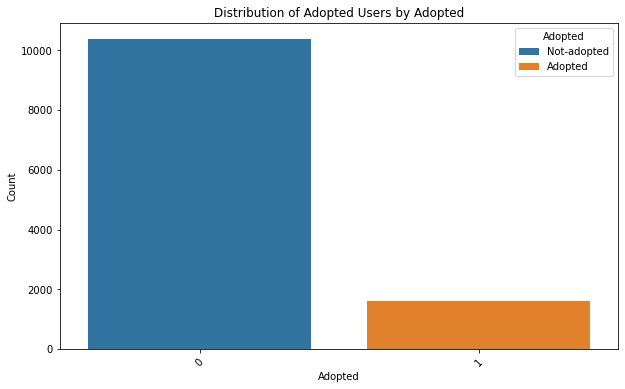

In [175]:
def plot_feature_distribution(data, feature):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='adopted', data=data)
    plt.title(f'Distribution of Adopted Users by {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Adopted', labels=['Not-adopted', 'Adopted'])
    plt.show()

# List of categorical features to plot
features = user_adopted_usage.drop(columns=['object_id','last_session_creation_time', 'org_id']).columns

for feature in features:
    plot_feature_distribution(user_adopted_usage, feature)


In [176]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [177]:
# Creating dummy features
user_adopted_usage=pd.get_dummies(user_adopted_usage,columns=['creation_source'],drop_first=True,dtype=int, prefix='C')
user_adopted_usage.head()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,C_ORG_INVITE,C_PERSONAL_PROJECTS,C_SIGNUP,C_SIGNUP_GOOGLE_AUTH
0,1,1.398139e+09,1,0,11,1,0,0,0,0,0
1,2,1.396238e+09,0,0,1,1,1,1,0,0,0
2,3,1.363735e+09,0,0,94,1,0,1,0,0,0
3,4,1.369210e+09,0,0,1,1,0,0,0,0,0
4,5,1.358850e+09,0,0,193,1,0,0,0,0,0


In [178]:
X=user_adopted_usage.drop(columns=['object_id','adopted'])
y=user_adopted_usage['adopted']

In [179]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
# Train a Random Forest classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [181]:
# Make predictions on the test set
y_pred = model_rf.predict(X_test)

In [182]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Display evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

Model Evaluation Metrics:
Accuracy: 0.91
Precision: 0.72
Recall: 0.58
F1 Score: 0.64
ROC-AUC Score: 0.77


Overall, the random forest model shows high accuracy and decent performance in terms of precision, recall, F1 score, and ROC-AUC score.

#### Feature Importance

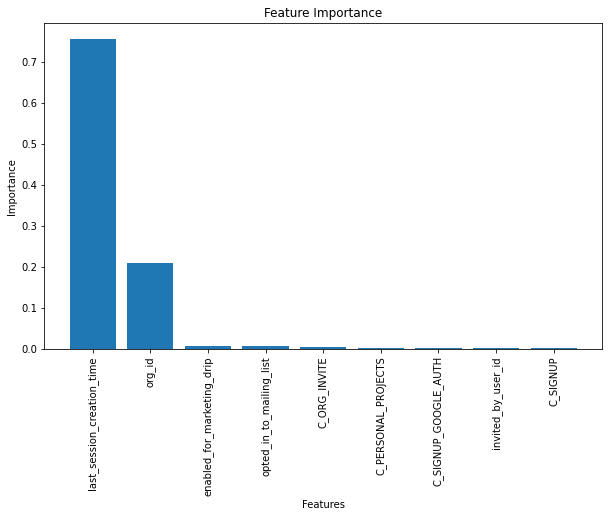

In [194]:
# Get feature importances
importances = model_rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on importance order
names = [X_train.columns[i] for i in indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [197]:
feature_importance = pd.DataFrame(list(zip(importances[indices], names)), columns=['Feature Importance', 'Variable'])
feature_importance

,Feature Importance,Variable
0,0.755818,last_session_creation_time
1,0.208768,org_id
2,0.008464,enabled_for_marketing_drip
3,0.008162,opted_in_to_mailing_list
4,0.005783,C_ORG_INVITE
5,0.004072,C_PERSONAL_PROJECTS
6,0.003147,C_SIGNUP_GOOGLE_AUTH
7,0.003105,invited_by_user_id
8,0.002682,C_SIGNUP


Based on the correlation matrix and the random forest model's feature importance, the factors that predict future user adoption can be identified as follows:

- Last Session Creation Time: Both the correlation matrix and the random forest model highlight the importance of last session creation time in predicting user adoption. Users who have recently created a session are more likely to be adopted.
- Organizational ID (org_id): The random forest model places significant importance on organizational affiliation. Users belonging to certain organizations may have higher adoption rates compared to others.
- Enabled for Marketing Drip: Although its importance is relatively low, users who are enabled for the marketing drip may show slightly higher adoption rates according to the random forest model.
- Opted-in to Mailing List: Similarly, opting-in to receive marketing emails shows a small positive impact on user adoption, as per the random forest model.
- Creation Source - Organization Invite (C_ORG_INVITE): This feature is also important, as indicated by the random forest model. Users invited to join organizations by others may have different adoption behaviors.
- Creation Source - Personal Projects (C_PERSONAL_PROJECTS): While not highly important, users invited to join personal projects may exhibit different adoption rates.
- Creation Source - Google Authentication (C_SIGNUP_GOOGLE_AUTH): Users signing up using Google Authentication also show some impact on adoption, although relatively minor.
- Invited by User ID (invited_by_user_id): The correlation matrix suggests a moderate negative correlation with adoption, while the random forest model indicates low importance. Users invited by specific other users may have varied adoption tendencies.

  
In summary, factors such as recent activity, organizational affiliation, creation source, engagement with marketing materials, and invitation methods play crucial roles in predicting future user adoption. 